## IPL Player Performance Analysis

In [1]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from random import sample
from numpy.random import uniform
from math import isnan
from itertools import combinations

from sklearn.linear_model import LinearRegression

In [2]:
# Accessing the dataset

ipl = pd.read_csv('Group5_APM_Dataset.csv')
ipl

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,126,"Yadav, AS",2,IND,DC,Batsman,0,0,0,0.00,...,125.64,2,0,0,0.00,0.00,0.00,2010,50000,750000
126,127,Younis Khan,2,PAK,RR,Batsman,6398,7,6814,75.78,...,42.85,0,0,0,0.00,0.00,0.00,2008,225000,225000
127,128,Yuvraj Singh,2,IND,KXIP+,Batsman,1775,9,8051,87.58,...,131.88,67,569,23,24.74,7.02,21.13,2011,400000,1800000
128,129,Zaheer Khan,2,IND,MI+,Bowler,1114,288,790,73.55,...,91.67,1,1783,65,27.43,7.75,21.26,2008,200000,450000


### Data Pre-processing

In [3]:
# Checking the dataset information

ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [4]:
# Checking for null values

ipl.isnull().sum()

Sl.NO.           0
PLAYER NAME      0
AGE              0
COUNTRY          0
TEAM             0
PLAYING ROLE     0
T-RUNS           0
T-WKTS           0
ODI-RUNS-S       0
ODI-SR-B         0
ODI-WKTS         0
ODI-SR-BL        0
CAPTAINCY EXP    0
RUNS-S           0
HS               0
AVE              0
SR-B             0
SIXERS           0
RUNS-C           0
WKTS             0
AVE-BL           0
ECON             0
SR-BL            0
AUCTION YEAR     0
BASE PRICE       0
SOLD PRICE       0
dtype: int64

In [5]:
ipl.isna().sum()

Sl.NO.           0
PLAYER NAME      0
AGE              0
COUNTRY          0
TEAM             0
PLAYING ROLE     0
T-RUNS           0
T-WKTS           0
ODI-RUNS-S       0
ODI-SR-B         0
ODI-WKTS         0
ODI-SR-BL        0
CAPTAINCY EXP    0
RUNS-S           0
HS               0
AVE              0
SR-B             0
SIXERS           0
RUNS-C           0
WKTS             0
AVE-BL           0
ECON             0
SR-BL            0
AUCTION YEAR     0
BASE PRICE       0
SOLD PRICE       0
dtype: int64

In [6]:
ipl1 = ipl.copy()
ipl1

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,126,"Yadav, AS",2,IND,DC,Batsman,0,0,0,0.00,...,125.64,2,0,0,0.00,0.00,0.00,2010,50000,750000
126,127,Younis Khan,2,PAK,RR,Batsman,6398,7,6814,75.78,...,42.85,0,0,0,0.00,0.00,0.00,2008,225000,225000
127,128,Yuvraj Singh,2,IND,KXIP+,Batsman,1775,9,8051,87.58,...,131.88,67,569,23,24.74,7.02,21.13,2011,400000,1800000
128,129,Zaheer Khan,2,IND,MI+,Bowler,1114,288,790,73.55,...,91.67,1,1783,65,27.43,7.75,21.26,2008,200000,450000


In [7]:
new_ipl_data = ipl.copy()

In [8]:
new_ipl_data

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,126,"Yadav, AS",2,IND,DC,Batsman,0,0,0,0.00,...,125.64,2,0,0,0.00,0.00,0.00,2010,50000,750000
126,127,Younis Khan,2,PAK,RR,Batsman,6398,7,6814,75.78,...,42.85,0,0,0,0.00,0.00,0.00,2008,225000,225000
127,128,Yuvraj Singh,2,IND,KXIP+,Batsman,1775,9,8051,87.58,...,131.88,67,569,23,24.74,7.02,21.13,2011,400000,1800000
128,129,Zaheer Khan,2,IND,MI+,Bowler,1114,288,790,73.55,...,91.67,1,1783,65,27.43,7.75,21.26,2008,200000,450000


**It can be concluded that there are no null values in the dataset.**

In [9]:
# Dropping the unnecessary features

ipl = ipl.drop(['Sl.NO.', 'AUCTION YEAR', 'BASE PRICE', 'SOLD PRICE'], axis = 1)
ipl

,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,...,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL
0,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,0,...,0,0,0.00,0.00,0,307,15,20.47,8.90,13.93
1,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,185,...,0,0,0.00,0.00,0,29,0,0.00,14.50,0.00
2,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,288,...,167,39,18.56,121.01,5,1059,29,36.52,8.81,24.90
3,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,51,...,58,11,5.80,76.32,0,1125,49,22.96,6.23,22.14
4,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,0,...,1317,71,32.93,120.71,28,0,0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,"Yadav, AS",2,IND,DC,Batsman,0,0,0,0.00,0,...,49,16,9.80,125.64,2,0,0,0.00,0.00,0.00
126,Younis Khan,2,PAK,RR,Batsman,6398,7,6814,75.78,3,...,3,3,3.00,42.85,0,0,0,0.00,0.00,0.00
127,Yuvraj Singh,2,IND,KXIP+,Batsman,1775,9,8051,87.58,109,...,1237,66,26.32,131.88,67,569,23,24.74,7.02,21.13
128,Zaheer Khan,2,IND,MI+,Bowler,1114,288,790,73.55,278,...,99,23,9.90,91.67,1,1783,65,27.43,7.75,21.26


In [10]:
ipl1

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,126,"Yadav, AS",2,IND,DC,Batsman,0,0,0,0.00,...,125.64,2,0,0,0.00,0.00,0.00,2010,50000,750000
126,127,Younis Khan,2,PAK,RR,Batsman,6398,7,6814,75.78,...,42.85,0,0,0,0.00,0.00,0.00,2008,225000,225000
127,128,Yuvraj Singh,2,IND,KXIP+,Batsman,1775,9,8051,87.58,...,131.88,67,569,23,24.74,7.02,21.13,2011,400000,1800000
128,129,Zaheer Khan,2,IND,MI+,Bowler,1114,288,790,73.55,...,91.67,1,1783,65,27.43,7.75,21.26,2008,200000,450000


### Exploratory Data Analysis (EDA)

In [11]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PLAYER NAME    130 non-null    object 
 1   AGE            130 non-null    int64  
 2   COUNTRY        130 non-null    object 
 3   TEAM           130 non-null    object 
 4   PLAYING ROLE   130 non-null    object 
 5   T-RUNS         130 non-null    int64  
 6   T-WKTS         130 non-null    int64  
 7   ODI-RUNS-S     130 non-null    int64  
 8   ODI-SR-B       130 non-null    float64
 9   ODI-WKTS       130 non-null    int64  
 10  ODI-SR-BL      130 non-null    float64
 11  CAPTAINCY EXP  130 non-null    int64  
 12  RUNS-S         130 non-null    int64  
 13  HS             130 non-null    int64  
 14  AVE            130 non-null    float64
 15  SR-B           130 non-null    float64
 16  SIXERS         130 non-null    int64  
 17  RUNS-C         130 non-null    int64  
 18  WKTS      

In [12]:
ipl['TEAM'].value_counts()

CSK      14
RCB+     12
KKR+     12
DD+      10
DC+      10
RR+       9
RCB       9
DC        7
KXIP+     7
MI        6
DD        6
MI+       6
RR        6
CSK+      5
KKR       5
KXIP      5
KXI+      1
Name: TEAM, dtype: int64

In [13]:
ipl[ipl['TEAM'] == 'RCB+'].iloc[:, 0:15]

,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,CAPTAINCY EXP,RUNS-S,HS,AVE
9,"Boucher, MV",2,SA,RCB+,W. Keeper,5515,1,4686,84.76,0,0.0,1,394,50,28.14
18,"Dravid, RS",3,IND,RCB+,Batsman,13288,1,10889,71.24,4,46.5,1,1703,75,27.92
51,"Kumar, P",1,IND,RCB+,Bowler,149,27,292,88.21,77,42.1,0,243,34,10.57
78,Pankaj Singh,2,IND,RCB+,Bowler,0,0,3,100.00,0,0.0,0,7,4,3.50
83,"Pietersen, KP",2,ENG,RCB+,Batsman,6654,5,4184,86.76,7,57.1,1,634,103,42.27
89,"Ryder, JD",2,NZ,RCB+,Allrounder,1269,5,1100,89.72,11,34.8,0,604,86,21.57
106,"Steyn, DW",2,SA,RCB+,Bowler,770,272,142,73.57,91,33.7,0,70,13,4.67
110,"Taylor, LRPL",2,NZ,RCB+,Batsman,2742,2,3185,81.77,0,0.0,1,895,81,27.97
116,"Uthappa, RV",2,IND,RCB+,Batsman,0,0,786,91.92,0,0.0,0,1538,69,26.98
118,Van der Merwe,2,SA,RCB+,Allrounder,0,0,39,95.12,17,41.4,0,137,35,15.22


In [14]:
ipl[ipl['TEAM'] == 'RCB+'].iloc[:, 15:]

,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL
9,127.51,13,0,0,0.00,0.00,0.00
18,116.88,23,0,0,0.00,0.00,0.00
51,114.08,14,1919,53,36.21,7.73,28.11
78,58.33,0,468,11,42.55,9.36,27.27
83,141.20,30,215,7,30.71,7.41,24.86
89,131.88,19,303,8,37.88,7.73,29.50
106,86.42,1,1304,59,22.10,6.58,20.15
110,130.28,45,24,0,0.00,12.00,0.00
116,126.17,59,0,0,0.00,0.00,0.00
118,118.10,8,427,18,23.72,6.83,20.94


In [15]:
ipl[ipl['TEAM'] == 'RCB'].iloc[:, 0:15]

,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,CAPTAINCY EXP,RUNS-S,HS,AVE
1,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,185,37.6,0,0,0,0.00
11,"Chanderpaul, S",3,WI,RCB,Batsman,9918,9,8778,70.74,14,52.8,1,25,16,8.33
40,"Jaffer, W",2,IND,RCB,Allrounder,1944,2,10,43.47,0,0.0,0,130,50,16.25
44,"Kallis, JH",3,SA,RCB,Allrounder,12379,276,11498,72.97,270,39.3,1,1965,89,30.70
50,"Kohli, V",1,IND,RCB,Batsman,491,0,3590,86.31,2,137.0,1,1639,73,28.26
52,"Kumble, A",3,IND,RCB,Bowler,2506,619,938,61.06,337,43.0,1,35,8,11.67
63,Misbah-ul-Haq,3,PAK,RCB,Batsman,2173,0,2763,75.10,0,0.0,1,117,47,16.71
65,"Mithun, A",1,IND,RCB,Bowler,120,9,51,92.72,3,60.0,0,32,11,8.00
73,"Noffke, AA",2,AUS,RCB,Allrounder,0,0,0,0.00,1,54.0,0,9,9,9.00


In [16]:
ipl[ipl['TEAM'] == 'RCB'].iloc[:, 15:]

,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL
1,0.00,0,29,0,0.00,14.50,0.00
11,80.64,0,0,0,0.00,0.00,0.00
40,107.44,3,0,0,0.00,0.00,0.00
44,110.95,37,1713,45,38.07,7.96,28.71
50,119.29,49,345,4,86.25,8.84,58.50
52,74.47,0,105,2,52.50,9.55,33.00
63,144.44,6,0,0,0.00,0.00,0.00
65,133.33,1,435,6,72.50,9.89,44.00
73,90.00,0,40,1,40.00,10.00,24.00


In [17]:
ipl.describe()

,AGE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,CAPTAINCY EXP,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,2.092308,2166.715385,66.530769,2508.738462,71.164385,76.076923,34.033846,0.315385,514.246154,47.430769,18.719308,111.053462,17.692308,475.523077,17.169231,23.110231,6.204462,17.382615
std,0.576627,3305.646757,142.676855,3582.205625,25.898440,111.205070,26.751749,0.466466,615.226335,36.403624,11.094224,35.928907,23.828146,558.314049,21.816763,20.802057,4.941531,15.273422
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,25.500000,0.000000,73.250000,65.650000,0.000000,0.000000,0.000000,39.000000,16.000000,9.825000,98.237500,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,542.500000,7.000000,835.000000,78.225000,18.500000,36.600000,0.000000,172.000000,35.500000,18.635000,118.510000,6.000000,297.000000,8.500000,24.785000,7.380000,19.935000
75%,2.000000,3002.250000,47.500000,3523.500000,86.790000,106.000000,45.325000,1.000000,925.250000,73.750000,27.872500,129.102500,29.750000,689.250000,23.750000,35.580000,8.247500,26.212500
max,3.000000,15470.000000,800.000000,18426.000000,116.660000,534.000000,150.000000,1.000000,2254.000000,158.000000,50.110000,235.490000,129.000000,1975.000000,83.000000,126.300000,38.110000,100.200000


In [18]:
ipl['CAPTAINCY EXP'].value_counts()

0    89
1    41
Name: CAPTAINCY EXP, dtype: int64

### Exploratory Data Analysis (EDA)

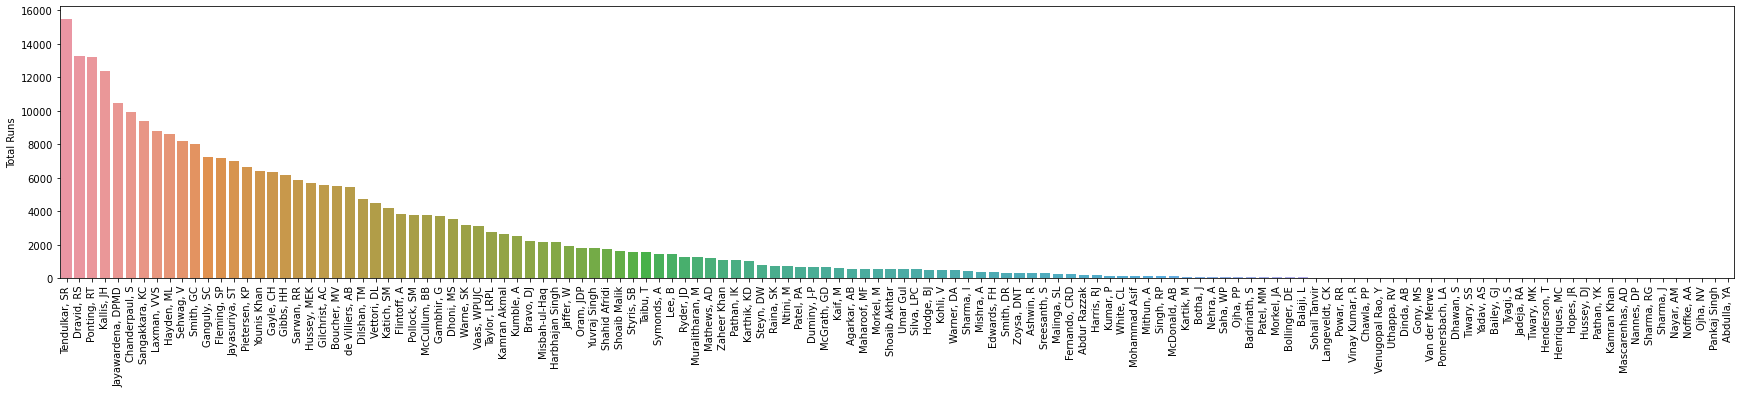

In [19]:
# T-Runs

plt.figure(figsize = (30,5))
truns = ipl[['PLAYER NAME','T-RUNS']].sort_values('T-RUNS', ascending = False)
ax = sns.barplot(x ='PLAYER NAME', y ='T-RUNS', data = truns)
ax.set(xlabel = '', ylabel = 'Total Runs')
plt.xticks(rotation = 90)
plt.show()

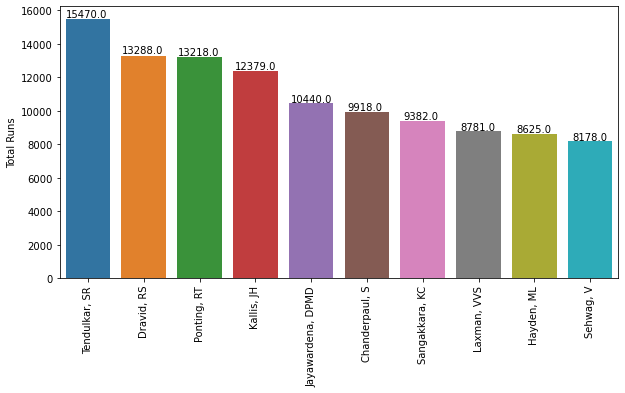

In [20]:
# Top 10 T-Runs
plt.figure(figsize = (10,5))
truns_top10 = ipl[['PLAYER NAME','T-RUNS']].sort_values('T-RUNS', ascending = False).head(10)
ax = sns.barplot(x ='PLAYER NAME', y = 'T-RUNS', data = truns_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel = 'Total Runs')
plt.xticks(rotation = 90)
plt.show()

In [21]:
required_cols = ['T-WKTS','ODI-RUNS-S','ODI-SR-B','ODI-WKTS','ODI-SR-BL','CAPTAINCY EXP','RUNS-S','HS','AVE','SR-B','SIXERS','RUNS-C','WKTS','AVE-BL','ECON','SR-BL']

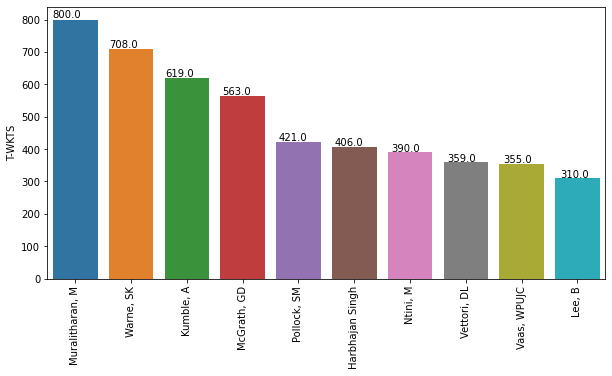

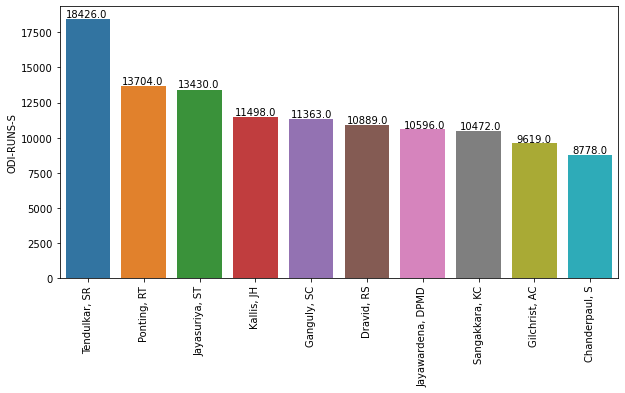

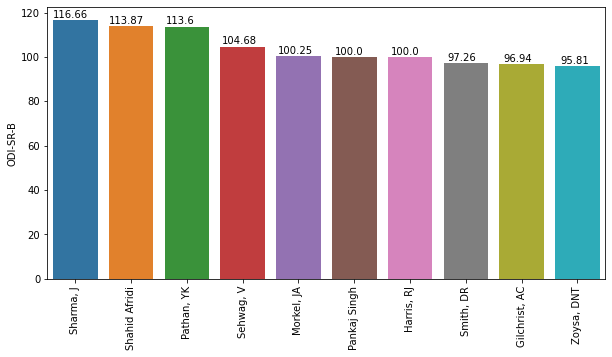

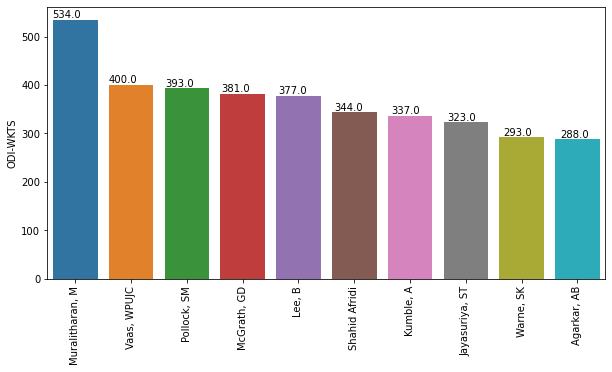

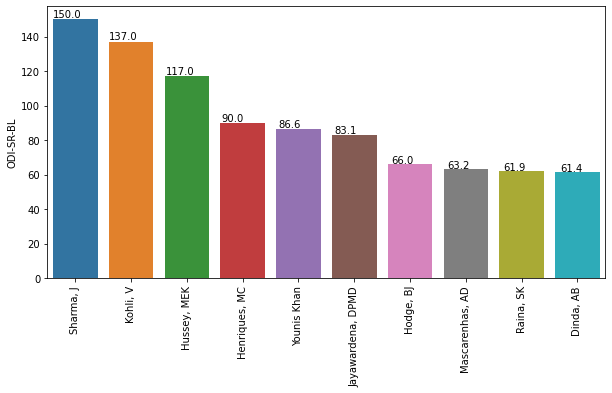

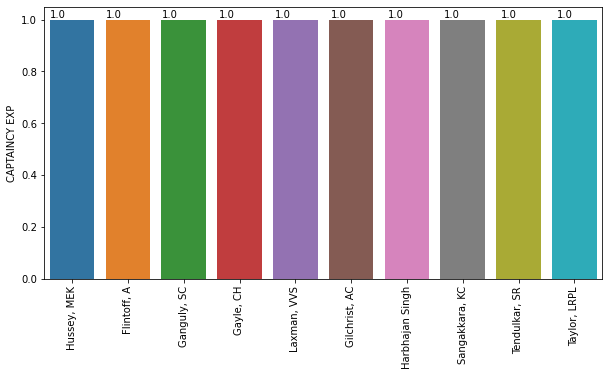

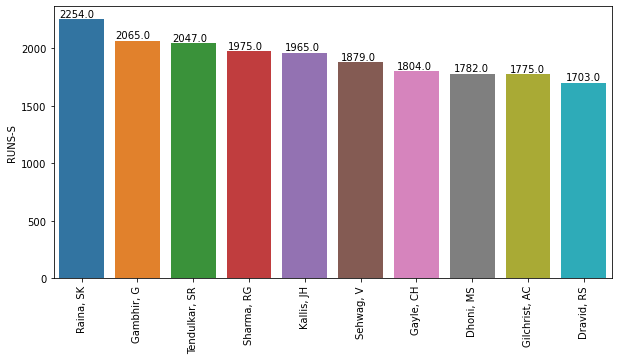

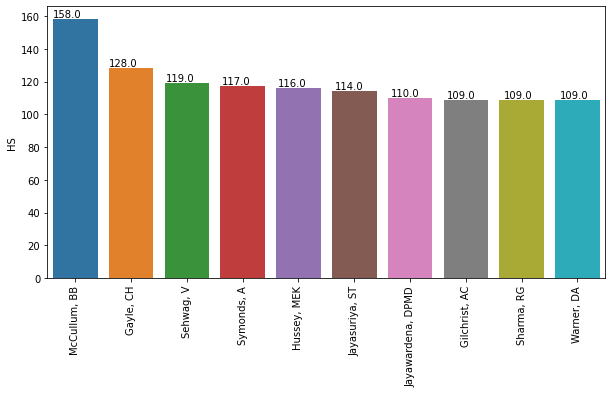

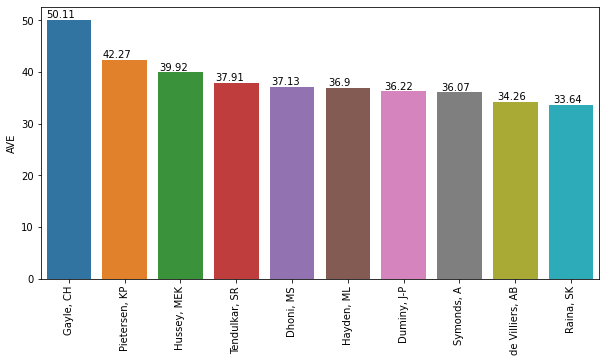

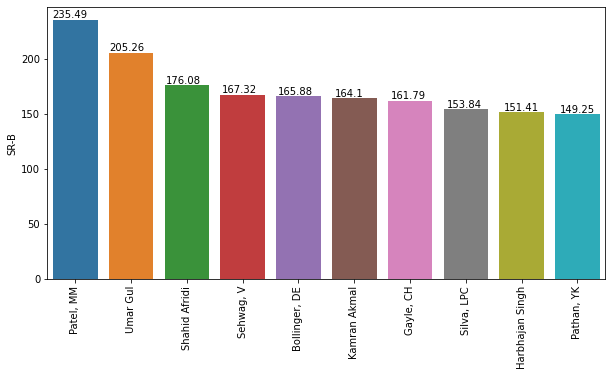

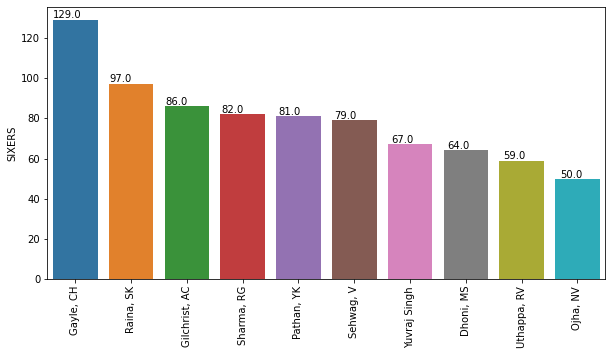

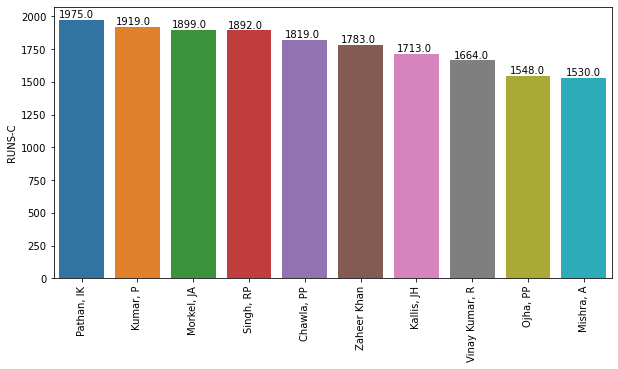

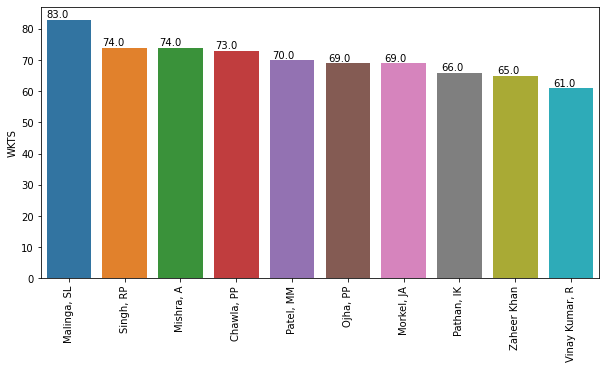

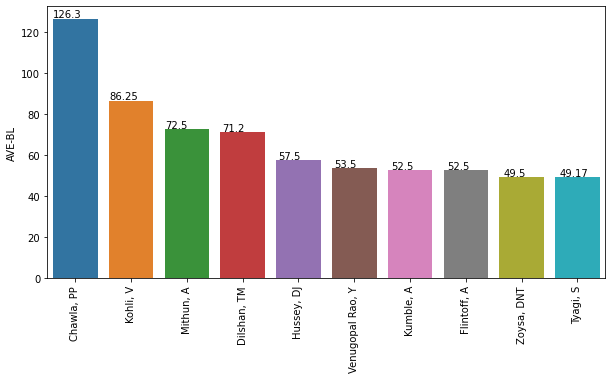

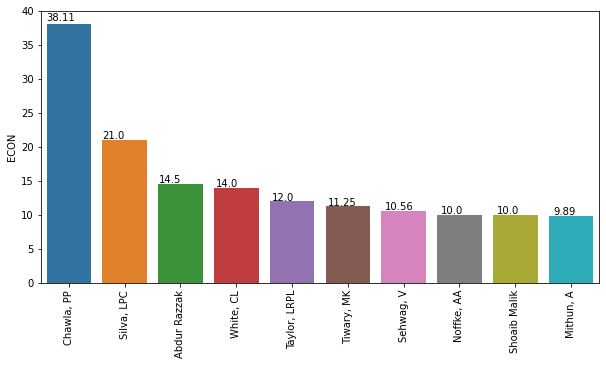

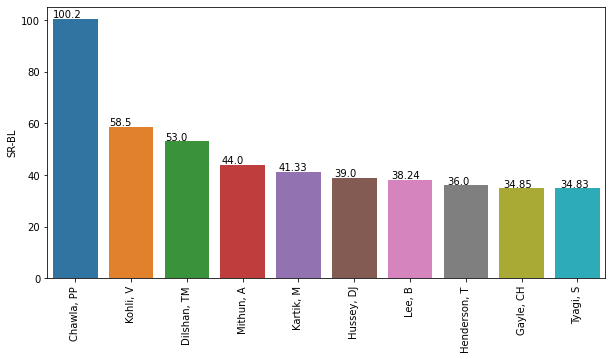

In [22]:
# Top 10 
for col in required_cols:
    plt.figure(figsize = (10,5))
    data_top10 = ipl[['PLAYER NAME',col]].sort_values(col, ascending = False).head(10)
    ax = sns.barplot(x = 'PLAYER NAME', y = col, data = data_top10)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
    ax.set(xlabel = '', ylabel = col)
    plt.xticks(rotation=90)
    plt.show()

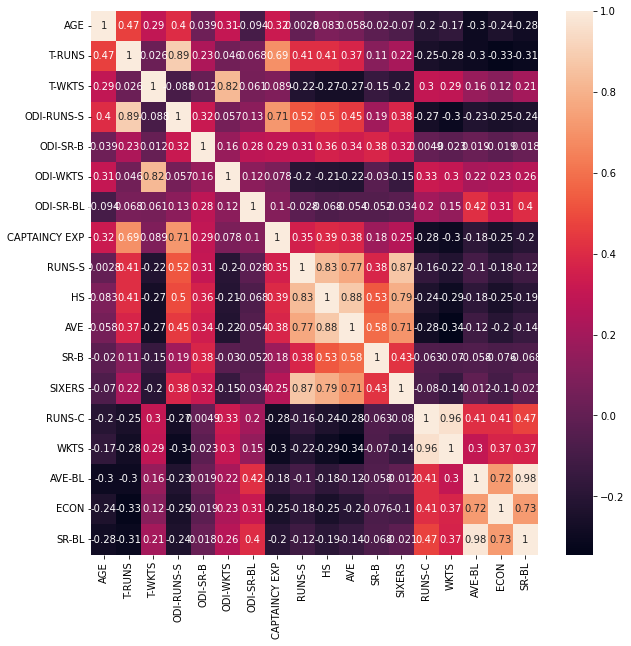

In [23]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (10, 10))
sns.heatmap(ipl.corr(), annot = True)
plt.savefig('Correlation')
plt.show()

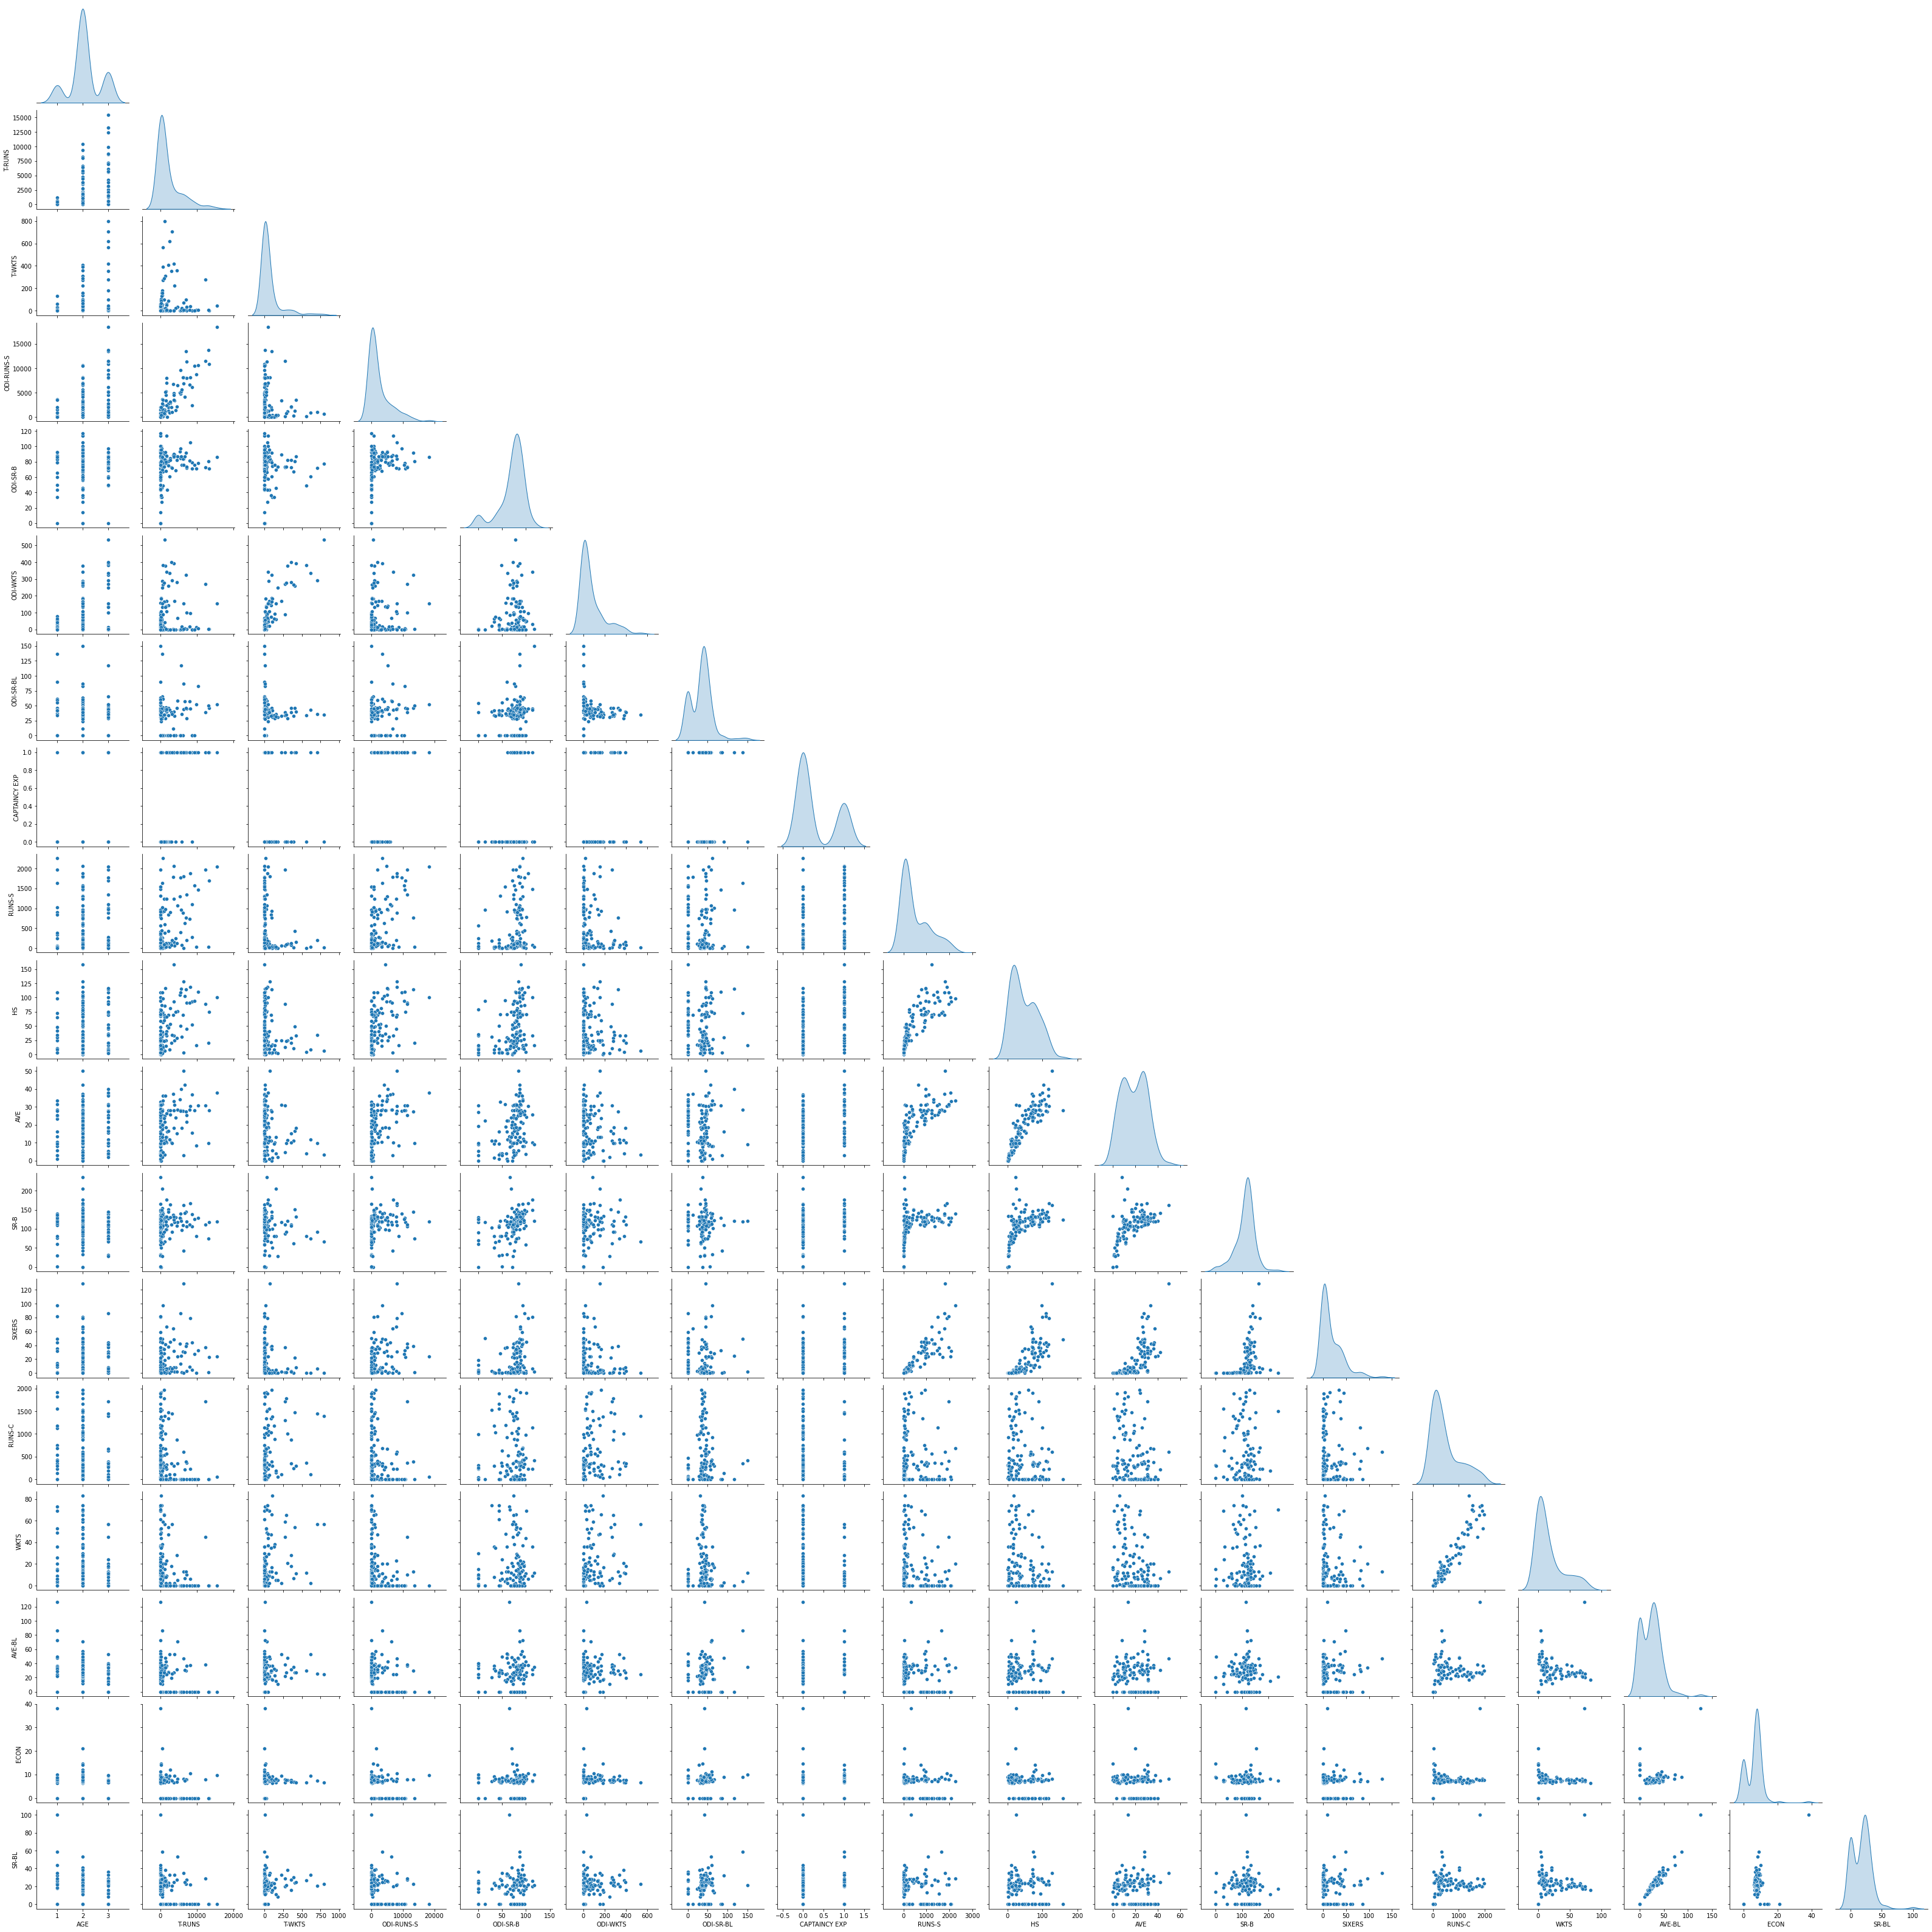

In [24]:
sns.pairplot(ipl, corner = True, diag_kind = "kde")
plt.show()

In [25]:
ipl1 = ipl.drop(['PLAYER NAME','COUNTRY','TEAM','PLAYING ROLE'], axis = 1)
ipl1

,AGE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,CAPTAINCY EXP,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL
0,2,0,0,0,0.00,0,0.0,0,0,0,0.00,0.00,0,307,15,20.47,8.90,13.93
1,2,214,18,657,71.41,185,37.6,0,0,0,0.00,0.00,0,29,0,0.00,14.50,0.00
2,2,571,58,1269,80.62,288,32.9,0,167,39,18.56,121.01,5,1059,29,36.52,8.81,24.90
3,1,284,31,241,84.56,51,36.8,0,58,11,5.80,76.32,0,1125,49,22.96,6.23,22.14
4,2,63,0,79,45.93,0,0.0,0,1317,71,32.93,120.71,28,0,0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2,0,0,0,0.00,0,0.0,0,49,16,9.80,125.64,2,0,0,0.00,0.00,0.00
126,2,6398,7,6814,75.78,3,86.6,1,3,3,3.00,42.85,0,0,0,0.00,0.00,0.00
127,2,1775,9,8051,87.58,109,44.3,1,1237,66,26.32,131.88,67,569,23,24.74,7.02,21.13
128,2,1114,288,790,73.55,278,35.4,0,99,23,9.90,91.67,1,1783,65,27.43,7.75,21.26


## Hopkins Statistics Test

In [26]:
# Calculating Hopkins score to know whether the data is good for clustering or not.

def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    HS = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HS):
        print(ujd, wjd)
        HS = 0
 
    return HS

In [27]:
# Hopkins score
Hopkins_score = round(hopkins(ipl1),2)
print(Hopkins_score)

0.81


**This Data has high tendency for clustering**

In [28]:
# Standardization of the dataset

scaler = StandardScaler()
ipl_scaled = scaler.fit_transform(ipl1)
ipl_scaled

array([[-0.16070148, -0.65799447, -0.46810776, ..., -0.12741261,
         0.54759676, -0.22692831],
       [-0.16070148, -0.59300633, -0.3414605 , ..., -1.11525664,
         1.68523286, -1.1424984 ],
       [-0.16070148, -0.48459152, -0.06002214, ...,  0.64713045,
         0.52931332,  0.49409135],
       ...,
       [-0.16070148, -0.11895727, -0.40478413, ...,  0.07864962,
         0.16567607,  0.24630246],
       [-0.16070148, -0.31969169,  1.5582484 , ...,  0.20846401,
         0.31397506,  0.2548469 ],
       [-0.16070148, -0.57053379, -0.01780639, ...,  1.27352105,
         0.56791169,  1.02647596]])

In [29]:
# Creating a DatFrame of the standardized data

ipl_new = pd.DataFrame(ipl_scaled, columns = ipl1.columns)
ipl_new

,AGE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,CAPTAINCY EXP,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL
0,-0.160701,-0.657994,-0.468108,-0.703043,-2.758455,-0.686760,-1.277132,-0.67873,-0.839099,-1.307954,-1.693829,-3.102880,-0.745369,-0.303010,-0.099814,-0.127413,0.547597,-0.226928
1,-0.160701,-0.593006,-0.341460,-0.518927,0.009520,0.983269,0.133821,-0.67873,-0.839099,-1.307954,-1.693829,-3.102880,-0.745369,-0.802864,-0.790019,-1.115257,1.685233,-1.142498
2,-0.160701,-0.484592,-0.060022,-0.347421,0.366516,1.913068,-0.042548,-0.67873,-0.566604,-0.232487,-0.014415,0.278190,-0.534721,1.049112,0.544377,0.647130,0.529313,0.494091
3,-1.901634,-0.571749,-0.249993,-0.635505,0.519237,-0.226374,0.103801,-0.67873,-0.744460,-1.004617,-1.169012,-0.970467,-0.745369,1.167783,1.464649,-0.007250,0.005188,0.312686
4,-0.160701,-0.638862,-0.468108,-0.680904,-0.978129,-0.686760,-1.277132,-0.67873,1.309858,0.649946,1.285864,0.269808,0.434258,-0.855007,-0.790019,-1.115257,-1.260432,-1.142498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,-0.160701,-0.657994,-0.468108,-0.703043,-2.758455,-0.686760,-1.277132,-0.67873,-0.759145,-0.866737,-0.807070,0.407554,-0.661109,-0.855007,-0.790019,-1.115257,-1.260432,-1.142498
126,-0.160701,1.284969,-0.418856,1.206496,0.178909,-0.659679,1.972563,1.47334,-0.834203,-1.225226,-1.422372,-1.905633,-0.745369,-0.855007,-0.790019,-1.115257,-1.260432,-1.142498
127,-0.160701,-0.118957,-0.404784,1.553150,0.636298,0.297203,0.385241,1.47334,1.179322,0.512066,0.687754,0.581902,2.077310,0.168075,0.268295,0.078650,0.165676,0.246302
128,-0.160701,-0.319692,1.558248,-0.481655,0.092471,1.822797,0.051265,-0.67873,-0.677560,-0.673704,-0.798021,-0.541582,-0.703239,2.350890,2.200867,0.208464,0.313975,0.254847


## K- means Clustering

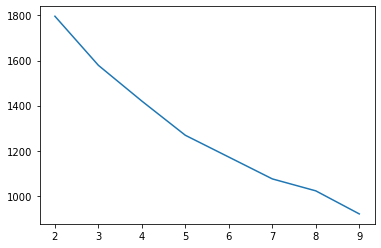

In [30]:
# Elbow curve method to find the ideal number of clusters.

clusters = list(range(2,10))
ssd = []
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters, max_iter = 50, random_state = 100)
    model_clus.fit(ipl_new)
    ssd.append(model_clus.inertia_)

plt.plot(clusters,ssd);

## Silhouette Analysis

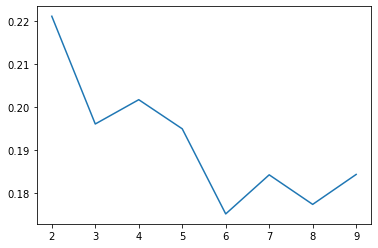

In [31]:
# Using silhouette score to get the optimal number of clusters count

ss = []
for k in range(2,10):
    k_means = KMeans(n_clusters = k, max_iter  =50, random_state = 100)
    k_means.fit(ipl_new)
    ss.append(silhouette_score(ipl_new, k_means.predict(ipl_new)))
plt.plot(range(2,10),ss)

In [32]:
#K-means with k=4 clusters

cluster = KMeans(n_clusters = 4, max_iter = 50, random_state = 100)
cluster.fit(ipl_new)

KMeans(max_iter=50, n_clusters=4, random_state=100)

In [33]:
# Cluster labels

cluster.labels_

array([0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 3, 0, 3, 3, 3, 2, 0, 2, 2, 0, 0,
       3, 1, 3, 2, 2, 3, 2, 0, 1, 0, 3, 0, 0, 0, 0, 0, 2, 0, 3, 2, 2, 3,
       2, 3, 0, 3, 0, 3, 2, 0, 1, 0, 3, 1, 0, 0, 0, 0, 3, 0, 1, 3, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 3, 0, 2, 2, 1, 3, 3, 0,
       2, 0, 3, 3, 3, 2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 3,
       3, 2, 0, 3, 0, 0, 3, 1, 0, 0, 1, 0, 1, 3, 3, 3, 3, 2, 1, 0])

In [34]:
# Assign the label

ipl['Cluster_Id'] = cluster.labels_
ipl

,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,...,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,Cluster_Id
0,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,0,...,0,0.00,0.00,0,307,15,20.47,8.90,13.93,0
1,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,185,...,0,0.00,0.00,0,29,0,0.00,14.50,0.00,0
2,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,288,...,39,18.56,121.01,5,1059,29,36.52,8.81,24.90,0
3,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,51,...,11,5.80,76.32,0,1125,49,22.96,6.23,22.14,0
4,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,0,...,71,32.93,120.71,28,0,0,0.00,0.00,0.00,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,"Yadav, AS",2,IND,DC,Batsman,0,0,0,0.00,0,...,16,9.80,125.64,2,0,0,0.00,0.00,0.00,3
126,Younis Khan,2,PAK,RR,Batsman,6398,7,6814,75.78,3,...,3,3.00,42.85,0,0,0,0.00,0.00,0.00,3
127,Yuvraj Singh,2,IND,KXIP+,Batsman,1775,9,8051,87.58,109,...,66,26.32,131.88,67,569,23,24.74,7.02,21.13,2
128,Zaheer Khan,2,IND,MI+,Bowler,1114,288,790,73.55,278,...,23,9.90,91.67,1,1783,65,27.43,7.75,21.26,1


## Visualization & Analysis

In [35]:
# Number of countries in each cluster

ipl.Cluster_Id.value_counts(ascending = True)

1    14
2    19
3    35
0    62
Name: Cluster_Id, dtype: int64

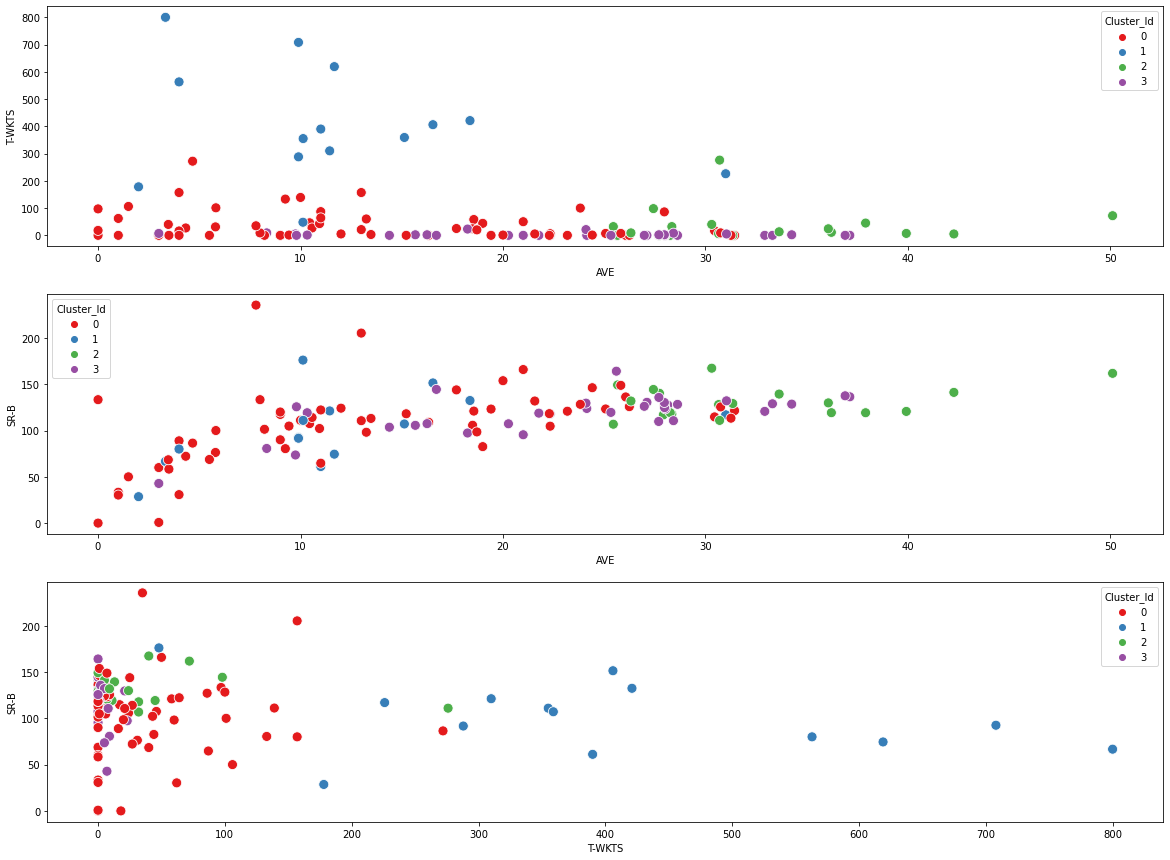

In [36]:
# Scatter plot on Original attributes to visualize the spread of the data

plt.figure(figsize = (20, 15))
plt.subplot(3, 1, 1)
sns.scatterplot(x = 'AVE', y = 'T-WKTS', hue = 'Cluster_Id', data = ipl, legend = 'full', palette = "Set1", s = 100)
plt.subplot(3, 1, 2)
sns.scatterplot(x = 'AVE', y = 'SR-B', hue = 'Cluster_Id', data = ipl, legend = 'full', palette = "Set1", s = 100)
plt.subplot(3, 1, 3)
sns.scatterplot(x = 'T-WKTS', y = 'SR-B', hue = 'Cluster_Id', data = ipl, legend = 'full', palette = "Set1", s = 100)
plt.show()

## Cluster Profiling

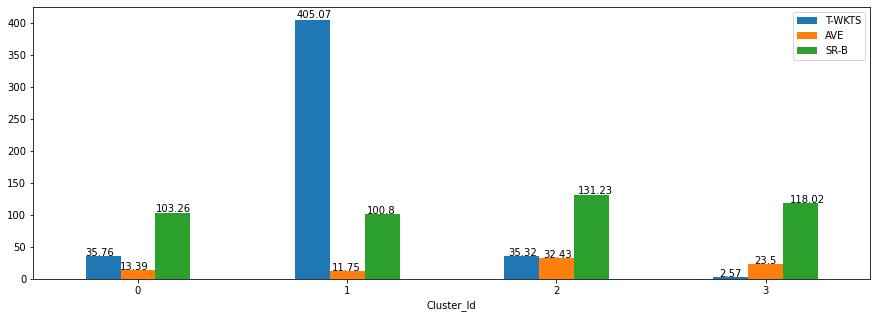

In [37]:
ax = ipl[['T-WKTS','AVE','SR-B','Cluster_Id']].groupby('Cluster_Id').mean().plot(kind = 'bar',figsize = (15,5))

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 0)
plt.show();

In [38]:
c0 = ipl[ipl['Cluster_Id'] == 0].sort_values(by = ['T-WKTS','AVE','SR-B'], ascending = [True, False, False])
c0['PLAYING ROLE'].value_counts()

Bowler        34
Allrounder    24
Batsman        4
Name: PLAYING ROLE, dtype: int64

**c0 cluster consists of primarily bowlers and bowling - all rounders.**

In [39]:
# Dispalying the players of the cluster c0.

ipl[ipl['Cluster_Id'] == 0].sort_values(by = ['T-WKTS','AVE','SR-B'], ascending = [True, False, False]).tail(30)

,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,...,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,Cluster_Id
8,"Botha, J",2,SA,RR,Allrounder,83,17,609,85.77,72,...,67,30.45,114.73,3,610,19,32.11,6.85,28.11,0
1,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,185,...,0,0.00,0.00,0,29,0,0.00,14.50,0.00,0
107,"Styris, SB",3,NZ,DC+,Allrounder,1586,20,4483,79.41,137,...,36,18.71,98.50,3,276,8,34.50,7.67,27.00,0
99,Shoaib Malik,2,PAK,DD,Allrounder,1606,21,5253,78.37,139,...,24,13.00,110.63,0,85,2,42.50,10.00,25.50,0
48,"Kartik, M",2,IND,KKR+,Bowler,88,24,126,70.78,37,...,21,18.50,105.71,1,1013,21,48.24,7.02,41.33,0
56,"Maharoof, MF",2,SL,DD,Allrounder,556,25,1042,84.44,133,...,39,17.70,143.90,9,520,27,19.26,7.43,15.56,0
51,"Kumar, P",1,IND,RCB+,Bowler,149,27,292,88.21,77,...,34,10.57,114.08,14,1919,53,36.21,7.73,28.11,0
6,"Balaji, L",2,IND,CSK+,Bowler,51,27,120,78.94,34,...,15,4.33,72.22,1,1342,52,25.81,7.98,19.40,0
3,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,51,...,11,5.80,76.32,0,1125,49,22.96,6.23,22.14,0
79,"Patel, MM",2,IND,RR+,Bowler,60,35,74,66.07,86,...,23,7.80,235.49,0,1504,70,21.49,7.39,17.47,0


In [40]:
ipl[ipl['Cluster_Id'] == 1].sort_values(by = ['T-WKTS','AVE','SR-B'], ascending = [True, False, False]).head()

,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,...,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,Cluster_Id
94,Shahid Afridi,2,PAK,DC,Allrounder,1716,48,7040,113.87,344,...,33,10.12,176.08,6,225,9,25.00,7.50,20.00,1
98,Shoaib Akhtar,3,PAK,KKR,Bowler,544,178,394,73.23,247,...,2,2.00,28.57,0,54,5,10.80,7.71,8.40,1
23,"Flintoff, A",2,ENG,CSK,Allrounder,3845,226,3394,88.82,169,...,24,31.00,116.98,2,105,2,52.50,9.55,33.00,1
128,Zaheer Khan,2,IND,MI+,Bowler,1114,288,790,73.55,278,...,23,9.90,91.67,1,1783,65,27.43,7.75,21.26,1
55,"Lee, B",2,AUS,KXI+,Bowler,1451,310,1100,82.45,377,...,25,11.44,121.18,6,1009,21,48.05,7.56,38.24,1


In [41]:
ipl[ipl['Cluster_Id'] == 2].sort_values(by = ['T-WKTS','AVE','SR-B'], ascending = [True, False, False]).head()

,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,...,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,Cluster_Id
97,"Sharma, RG",1,IND,DC+,Batsman,0,0,1961,78.85,8,...,109,31.35,129.17,82,408,14,29.14,8.00,21.86,2
50,"Kohli, V",1,IND,RCB,Batsman,491,0,3590,86.31,2,...,73,28.26,119.29,49,345,4,86.25,8.84,58.50,2
28,"Gilchrist, AC",3,AUS,DC+,W. Keeper,5570,0,9619,96.94,0,...,109,27.73,140.21,86,0,0,0.00,0.00,0.00,2
82,"Pathan, YK",2,IND,RR+,Allrounder,0,0,810,113.60,33,...,100,25.66,149.25,81,1139,36,31.64,7.20,26.36,2
18,"Dravid, RS",3,IND,RCB+,Batsman,13288,1,10889,71.24,4,...,75,27.92,116.88,23,0,0,0.00,0.00,0.00,2


In [42]:
ipl[ipl['Cluster_Id'] == 3].sort_values(by = ['SR-B','AVE','SIXERS'], ascending = [False, False, False])

,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,...,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,Cluster_Id
45,Kamran Akmal,2,PAK,RR,W. Keeper,2648,0,2924,84.31,0,...,53,25.60,164.10,8,0,0,0.0,0.00,0.0,3
63,Misbah-ul-Haq,3,PAK,RCB,Batsman,2173,0,2763,75.10,0,...,47,16.71,144.44,6,0,0,0.0,0.00,0.0,3
32,"Hayden, ML",3,AUS,CSK,Batsman,8625,0,6133,78.96,0,...,93,36.90,137.52,44,0,0,0.0,0.00,0.0,3
15,"Dhoni, MS",2,IND,CSK,W. Keeper,3509,0,6773,88.19,1,...,70,37.13,136.45,64,0,0,0.0,0.00,0.0,3
123,"Warner, DA",1,AUS,DD,Batsman,483,2,876,85.79,0,...,109,27.70,135.76,44,0,0,0.0,0.00,0.0,3
124,"White, CL",2,AUS,RCB+,Batsman,146,5,2037,80.48,12,...,78,31.04,132.09,29,70,0,0.0,14.00,0.0,3
85,"Pomersbach, LA",2,AUS,KXIP+,Batsman,0,0,0,0.00,0,...,79,27.11,130.48,12,0,0,0.0,0.00,0.0,3
110,"Taylor, LRPL",2,NZ,RCB+,Batsman,2742,2,3185,81.77,0,...,81,27.97,130.28,45,24,0,0.0,12.00,0.0,3
49,"Katich, SM",3,AUS,KXIP,Batsman,4188,21,1324,68.74,0,...,75,24.10,129.57,8,0,0,0.0,0.00,0.0,3
24,"Gambhir, G",2,IND,DD+,Batsman,3712,0,4819,86.17,0,...,93,33.31,128.90,32,0,0,0.0,0.00,0.0,3


In [43]:
# Creating a DataFrame for Batsmen and batting all-rounders

bat = ipl[ipl['Cluster_Id'] == 2]
bat['PLAYING ROLE'].value_counts()

Batsman       12
Allrounder     6
W. Keeper      1
Name: PLAYING ROLE, dtype: int64

In [44]:
# Creating a DataFrame for Bowler

bowl = ipl[ipl['Cluster_Id'] == 1]
bowl['PLAYING ROLE'].value_counts()

Bowler        10
Allrounder     4
Name: PLAYING ROLE, dtype: int64

In [45]:
# Creating a DataFrame for Bowlers and Bowling Allrounders

all_round = ipl[ipl['Cluster_Id'] == 0]
all_round

,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,...,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,Cluster_Id
0,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,0,...,0,0.00,0.00,0,307,15,20.47,8.90,13.93,0
1,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,185,...,0,0.00,0.00,0,29,0,0.00,14.50,0.00,0
2,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,288,...,39,18.56,121.01,5,1059,29,36.52,8.81,24.90,0
3,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,51,...,11,5.80,76.32,0,1125,49,22.96,6.23,22.14,0
6,"Balaji, L",2,IND,CSK+,Bowler,51,27,120,78.94,34,...,15,4.33,72.22,1,1342,52,25.81,7.98,19.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Umar Gul,2,PAK,KKR,Bowler,541,157,368,69.04,154,...,24,13.00,205.26,5,184,12,15.33,8.17,11.20,0
118,Van der Merwe,2,SA,RCB+,Allrounder,0,0,39,95.12,17,...,35,15.22,118.10,8,427,18,23.72,6.83,20.94,0
119,"Venugopal Rao, Y",2,IND,DC+,Batsman,0,0,218,60.05,0,...,71,22.29,118.24,37,321,6,53.50,9.44,34.00,0
121,"Vinay Kumar, R",2,IND,RCB+,Bowler,11,1,43,43.87,28,...,25,9.43,104.83,5,1664,61,27.28,8.24,19.87,0


In [46]:
# Creating a DataFrame for Wicket Keeper Batsmen

hit = ipl[ipl['Cluster_Id'] == 3]
hit['PLAYING ROLE'].value_counts()

Batsman       23
W. Keeper     11
Allrounder     1
Name: PLAYING ROLE, dtype: int64

In [47]:
# Get the budget from the user
while True:
    try:
        budget = int(input("Enter the budget: "))
        break
    except ValueError:
        print("Invalid input. Please enter an integer.")

Enter the budget: 2500000


In [48]:
clust0 = ipl[ipl['Cluster_Id'] == 0]
clust1 = ipl[ipl['Cluster_Id'] == 1]
clust2 = ipl[ipl['Cluster_Id'] == 2]
clust3 = ipl[ipl['Cluster_Id'] == 3]

In [49]:
# Define the required number of players for each role
num_players_c0 = 4
num_players_c1 = 2
num_players_c2 = 2
num_players_c3 = 3

# Define the budget
# budget = 2500000

# Find all possible combinations of players for each role
clust0_combinations = combinations(clust0.index, num_players_c0)
clust1_combinations = combinations(clust1.index, num_players_c1)
clust2_combinations = combinations(clust2.index, num_players_c2)
clust3_combinations = combinations(clust3.index, num_players_c3)

# Find all valid combinations of players within the budget
valid_combinations1 = []
for clust0_combination in clust0_combinations:
    for clust1_combination in clust1_combinations:
        for clust2_combination in clust2_combinations:
            for clust3_combination in clust3_combinations:
                # Combine the indices of players from each role into a single list
                player_indices = list(clust0_combination) + list(clust1_combination) + list(clust2_combination) + list(clust3_combination)
                
                # Get the players in the combination
                players = new_ipl_data.loc[player_indices]
                
                # Calculate the sum of base price of the players
                sum_base_price = players['BASE PRICE'].sum()

                # Check if the sum of base price is under the given budget
                if sum_base_price <= budget:
                    # If the combination satisfies all the conditions, store it in the list of valid combinations
                    # valid_combinations1.append([players['PLAYER NAME'],players['PLAYING ROLE']])
                    valid_combinations1.append(player_indices)

# Print the valid combinations
print('The number of the teams which are available within the budget: ', len(valid_combinations1))
print('The teams are:\n')
for combination in valid_combinations1:
    new_team = new_ipl_data.loc[combination]
    print(new_team[['PLAYER NAME','PLAYING ROLE']],'\n')

The number of the teams which are available within the budget:  707
The teams are:

        PLAYER NAME PLAYING ROLE
0       Abdulla, YA   Allrounder
1      Abdur Razzak       Bowler
2       Agarkar, AB       Bowler
3         Ashwin, R       Bowler
23      Flintoff, A   Allrounder
30  Harbhajan Singh       Bowler
16      Dilshan, TM   Allrounder
18       Dravid, RS      Batsman
4      Badrinath, S      Batsman
5        Bailey, GJ      Batsman
9       Boucher, MV    W. Keeper 

        PLAYER NAME PLAYING ROLE
0       Abdulla, YA   Allrounder
1      Abdur Razzak       Bowler
2       Agarkar, AB       Bowler
3         Ashwin, R       Bowler
23      Flintoff, A   Allrounder
30  Harbhajan Singh       Bowler
16      Dilshan, TM   Allrounder
18       Dravid, RS      Batsman
4      Badrinath, S      Batsman
5        Bailey, GJ      Batsman
11   Chanderpaul, S      Batsman 

        PLAYER NAME PLAYING ROLE
0       Abdulla, YA   Allrounder
1      Abdur Razzak       Bowler
2       Agarkar, AB  

75         Ojha, NV    W. Keeper 

        PLAYER NAME PLAYING ROLE
0       Abdulla, YA   Allrounder
1      Abdur Razzak       Bowler
2       Agarkar, AB       Bowler
3         Ashwin, R       Bowler
23      Flintoff, A   Allrounder
30  Harbhajan Singh       Bowler
16      Dilshan, TM   Allrounder
18       Dravid, RS      Batsman
5        Bailey, GJ      Batsman
40        Jaffer, W   Allrounder
80        Patel, PA    W. Keeper 

        PLAYER NAME PLAYING ROLE
0       Abdulla, YA   Allrounder
1      Abdur Razzak       Bowler
2       Agarkar, AB       Bowler
3         Ashwin, R       Bowler
23      Flintoff, A   Allrounder
30  Harbhajan Singh       Bowler
16      Dilshan, TM   Allrounder
18       Dravid, RS      Batsman
5        Bailey, GJ      Batsman
40        Jaffer, W   Allrounder
85   Pomersbach, LA      Batsman 

        PLAYER NAME PLAYING ROLE
0       Abdulla, YA   Allrounder
1      Abdur Razzak       Bowler
2       Agarkar, AB       Bowler
3         Ashwin, R       Bowler
23  

125        Yadav, AS      Batsman 

         PLAYER NAME PLAYING ROLE
0        Abdulla, YA   Allrounder
1       Abdur Razzak       Bowler
2        Agarkar, AB       Bowler
3          Ashwin, R       Bowler
23       Flintoff, A   Allrounder
30   Harbhajan Singh       Bowler
16       Dilshan, TM   Allrounder
18        Dravid, RS      Batsman
13   de Villiers, AB    W. Keeper
124        White, CL      Batsman
125        Yadav, AS      Batsman 

        PLAYER NAME PLAYING ROLE
0       Abdulla, YA   Allrounder
1      Abdur Razzak       Bowler
2       Agarkar, AB       Bowler
3         Ashwin, R       Bowler
23      Flintoff, A   Allrounder
30  Harbhajan Singh       Bowler
16      Dilshan, TM   Allrounder
18       Dravid, RS      Batsman
14        Dhawan, S      Batsman
24       Gambhir, G      Batsman
85   Pomersbach, LA      Batsman 

        PLAYER NAME PLAYING ROLE
0       Abdulla, YA   Allrounder
1      Abdur Razzak       Bowler
2       Agarkar, AB       Bowler
3         Ashwin, R     

125        Yadav, AS      Batsman 

        PLAYER NAME PLAYING ROLE
0       Abdulla, YA   Allrounder
1      Abdur Razzak       Bowler
2       Agarkar, AB       Bowler
3         Ashwin, R       Bowler
23      Flintoff, A   Allrounder
30  Harbhajan Singh       Bowler
16      Dilshan, TM   Allrounder
18       Dravid, RS      Batsman
43          Kaif, M      Batsman
80        Patel, PA    W. Keeper
85   Pomersbach, LA      Batsman 

         PLAYER NAME PLAYING ROLE
0        Abdulla, YA   Allrounder
1       Abdur Razzak       Bowler
2        Agarkar, AB       Bowler
3          Ashwin, R       Bowler
23       Flintoff, A   Allrounder
30   Harbhajan Singh       Bowler
16       Dilshan, TM   Allrounder
18        Dravid, RS      Batsman
43           Kaif, M      Batsman
80         Patel, PA    W. Keeper
125        Yadav, AS      Batsman 

        PLAYER NAME PLAYING ROLE
0       Abdulla, YA   Allrounder
1      Abdur Razzak       Bowler
2       Agarkar, AB       Bowler
3         Ashwin, R     

125        Yadav, AS      Batsman 

        PLAYER NAME PLAYING ROLE
0       Abdulla, YA   Allrounder
1      Abdur Razzak       Bowler
2       Agarkar, AB       Bowler
3         Ashwin, R       Bowler
23      Flintoff, A   Allrounder
30  Harbhajan Singh       Bowler
16      Dilshan, TM   Allrounder
18       Dravid, RS      Batsman
80        Patel, PA    W. Keeper
85   Pomersbach, LA      Batsman
90         Saha, WP    W. Keeper 

         PLAYER NAME PLAYING ROLE
0        Abdulla, YA   Allrounder
1       Abdur Razzak       Bowler
2        Agarkar, AB       Bowler
3          Ashwin, R       Bowler
23       Flintoff, A   Allrounder
30   Harbhajan Singh       Bowler
16       Dilshan, TM   Allrounder
18        Dravid, RS      Batsman
80         Patel, PA    W. Keeper
85    Pomersbach, LA      Batsman
109         Taibu, T    W. Keeper 

         PLAYER NAME PLAYING ROLE
0        Abdulla, YA   Allrounder
1       Abdur Razzak       Bowler
2        Agarkar, AB       Bowler
3          Ashwin, R

In [50]:
# Get the number of players for each role from the user
while True:
    try:
        num_batsmen = int(input("Enter the number of batsmen: "))
        num_bowlers = int(input("Enter the number of bowlers: "))
        num_all_rounders = int(input("Enter the number of all-rounders: "))
        num_wicket_keepers = int(input("Enter the number of wicket-keepers: "))

        if num_batsmen + num_bowlers + num_all_rounders + num_wicket_keepers != 11:
            print("Invalid input. The total number of players must be 11.")
        else:
            break
    except ValueError:
        print("Invalid input. Please enter an integer.")

Enter the number of batsmen: 3
Enter the number of bowlers: 4
Enter the number of all-rounders: 3
Enter the number of wicket-keepers: 1


In [51]:
# Get any players to include or exclude from the user

include_players = input("Enter the players to include (semi colon-separated player names like Abdulla, YA;Abdur Razzak): ")
if include_players:
    include_players = include_players.split(';')
    include_players = new_ipl_data[new_ipl_data['PLAYER NAME'].isin(include_players)]
    if len(include_players) != len(set(include_players['PLAYER NAME'])):
        print("Duplicate player names entered! Please enter unique player names.")
        include_players = None

exclude_players = input("Enter the players to exclude (semi colon-separated player names like Kamran Akmal;Boucher, MV): ")
if exclude_players:
    exclude_players = exclude_players.split(';')
    exclude_players = new_ipl_data[new_ipl_data['PLAYER NAME'].isin(exclude_players)]
    if len(exclude_players) != len(set(exclude_players['PLAYER NAME'])):
        print("Duplicate player names entered! Please enter unique player names.")
        exclude_players = None

Enter the players to include (semi colon-separated player names like Abdulla, YA;Abdur Razzak): Abdulla, YA;Abdur Razzak
Enter the players to exclude (semi colon-separated player names like Kamran Akmal;Boucher, MV): Kamran Akmal;Boucher, MV


In [52]:
include_players

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.0,0,307,15,20.47,8.9,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.0,0,29,0,0.00,14.5,0.00,2008,50000,50000


In [53]:
exclude_players

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
9,10,"Boucher, MV",2,SA,RCB+,W. Keeper,5515,1,4686,84.76,...,127.51,13,0,0,0.0,0.0,0.0,2008,200000,450000
45,46,Kamran Akmal,2,PAK,RR,W. Keeper,2648,0,2924,84.31,...,164.10,8,0,0,0.0,0.0,0.0,2008,150000,150000


In [54]:
included_players_indices = include_players.index.tolist()
included_players_indices

[0, 1]

In [55]:
excluded_players_indices = exclude_players.index.tolist()
excluded_players_indices

[9, 45]

In [56]:
# included_players = ['Abdulla, YA','Abdur Razzak']
# excluded_players = ['Kamran Akmal','Boucher, MV']

# # get the indices of players in the dataframe
# included_players_indices = [i for i, name in enumerate(new_ipl_data['PLAYER NAME']) if name in included_players]
# excluded_players_indices = [i for i, name in enumerate(new_ipl_data['PLAYER NAME']) if name in excluded_players]

# print(included_players_indices)
# print(excluded_players_indices)

count_combinations = 0

# Filter the combinations based on included and excluded players
filtered_combinations = []
for c in valid_combinations1:
    included = all(i in c for i in included_players_indices)
    excluded = not any(e in c for e in excluded_players_indices)
    if included and excluded:
        filtered_combinations.append(c)

for combination in filtered_combinations:

    new_team = new_ipl_data.loc[combination]
          
    values_to_drop = new_team['Sl.NO.'].values
    remaining_players = new_ipl_data[~new_ipl_data['Sl.NO.'].isin(values_to_drop)]
    
    # Training and testing data for Regression to predict the average
    y_train = remaining_players['AVE']
    X_train = remaining_players.drop(['AVE','PLAYER NAME','COUNTRY','TEAM','PLAYING ROLE','AUCTION YEAR','BASE PRICE','SOLD PRICE'], axis = 1)
    X_test = new_team.drop(['AVE','PLAYER NAME','COUNTRY','TEAM','PLAYING ROLE','AUCTION YEAR','BASE PRICE','SOLD PRICE'], axis = 1)
    
    # Create a linear regression object
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    
    num_batsman_team = len(new_team[new_team['PLAYING ROLE'] == 'Batsman'])
    num_bowler_team = len(new_team[new_team['PLAYING ROLE'] == 'Bowler'])
    num_Allrounder_team = len(new_team[new_team['PLAYING ROLE'] == 'Allrounder'])
    num_WKeeper_team = len(new_team[new_team['PLAYING ROLE'] == 'W. Keeper'])
    if num_batsman_team == num_batsmen and num_bowler_team == num_bowlers and num_Allrounder_team == num_all_rounders and num_WKeeper_team == num_wicket_keepers:
        count_combinations = count_combinations + 1
        new_team['AVE_PRED']=regressor.predict(X_test)
        print(new_team[['PLAYER NAME','PLAYING ROLE']],'\n')
        print('The predicted average of the above team',count_combinations, 'is:', new_team['AVE_PRED'].sum(),'\n\n')
    elif count_combinations == 0: 
        print('No such Combination exists')

No such Combination exists
        PLAYER NAME PLAYING ROLE
0       Abdulla, YA   Allrounder
1      Abdur Razzak       Bowler
2       Agarkar, AB       Bowler
3         Ashwin, R       Bowler
23      Flintoff, A   Allrounder
30  Harbhajan Singh       Bowler
16      Dilshan, TM   Allrounder
18       Dravid, RS      Batsman
4      Badrinath, S      Batsman
5        Bailey, GJ      Batsman
13  de Villiers, AB    W. Keeper 

The predicted average of the above team 1 is: 201.05872041474174 


        PLAYER NAME PLAYING ROLE
0       Abdulla, YA   Allrounder
1      Abdur Razzak       Bowler
2       Agarkar, AB       Bowler
3         Ashwin, R       Bowler
23      Flintoff, A   Allrounder
30  Harbhajan Singh       Bowler
16      Dilshan, TM   Allrounder
18       Dravid, RS      Batsman
4      Badrinath, S      Batsman
5        Bailey, GJ      Batsman
47      Karthik, KD    W. Keeper 

The predicted average of the above team 2 is: 194.43683744600466 


        PLAYER NAME PLAYING ROLE
0       

        PLAYER NAME PLAYING ROLE
0       Abdulla, YA   Allrounder
1      Abdur Razzak       Bowler
2       Agarkar, AB       Bowler
3         Ashwin, R       Bowler
23      Flintoff, A   Allrounder
30  Harbhajan Singh       Bowler
16      Dilshan, TM   Allrounder
18       Dravid, RS      Batsman
4      Badrinath, S      Batsman
63    Misbah-ul-Haq      Batsman
80        Patel, PA    W. Keeper 

The predicted average of the above team 24 is: 193.3499233368574 


        PLAYER NAME PLAYING ROLE
0       Abdulla, YA   Allrounder
1      Abdur Razzak       Bowler
2       Agarkar, AB       Bowler
3         Ashwin, R       Bowler
23      Flintoff, A   Allrounder
30  Harbhajan Singh       Bowler
16      Dilshan, TM   Allrounder
18       Dravid, RS      Batsman
4      Badrinath, S      Batsman
63    Misbah-ul-Haq      Batsman
90         Saha, WP    W. Keeper 

The predicted average of the above team 25 is: 192.81781517827795 


         PLAYER NAME PLAYING ROLE
0        Abdulla, YA   Allrounder

        PLAYER NAME PLAYING ROLE
0       Abdulla, YA   Allrounder
1      Abdur Razzak       Bowler
2       Agarkar, AB       Bowler
3         Ashwin, R       Bowler
23      Flintoff, A   Allrounder
30  Harbhajan Singh       Bowler
16      Dilshan, TM   Allrounder
18       Dravid, RS      Batsman
5        Bailey, GJ      Batsman
14        Dhawan, S      Batsman
90         Saha, WP    W. Keeper 

The predicted average of the above team 55 is: 197.76574342576555 


         PLAYER NAME PLAYING ROLE
0        Abdulla, YA   Allrounder
1       Abdur Razzak       Bowler
2        Agarkar, AB       Bowler
3          Ashwin, R       Bowler
23       Flintoff, A   Allrounder
30   Harbhajan Singh       Bowler
16       Dilshan, TM   Allrounder
18        Dravid, RS      Batsman
5         Bailey, GJ      Batsman
14         Dhawan, S      Batsman
109         Taibu, T    W. Keeper 

The predicted average of the above team 56 is: 187.9615181543452 


        PLAYER NAME PLAYING ROLE
0       Abdulla, YA   

        PLAYER NAME PLAYING ROLE
0       Abdulla, YA   Allrounder
1      Abdur Razzak       Bowler
2       Agarkar, AB       Bowler
3         Ashwin, R       Bowler
23      Flintoff, A   Allrounder
30  Harbhajan Singh       Bowler
16      Dilshan, TM   Allrounder
18       Dravid, RS      Batsman
5        Bailey, GJ      Batsman
60     McCullum, BB    W. Keeper
85   Pomersbach, LA      Batsman 

The predicted average of the above team 74 is: 216.80072396036422 


         PLAYER NAME PLAYING ROLE
0        Abdulla, YA   Allrounder
1       Abdur Razzak       Bowler
2        Agarkar, AB       Bowler
3          Ashwin, R       Bowler
23       Flintoff, A   Allrounder
30   Harbhajan Singh       Bowler
16       Dilshan, TM   Allrounder
18        Dravid, RS      Batsman
5         Bailey, GJ      Batsman
60      McCullum, BB    W. Keeper
113       Tiwary, SS      Batsman 

The predicted average of the above team 75 is: 208.22527471825612 


         PLAYER NAME PLAYING ROLE
0        Abdulla, YA

         PLAYER NAME PLAYING ROLE
0        Abdulla, YA   Allrounder
1       Abdur Razzak       Bowler
2        Agarkar, AB       Bowler
3          Ashwin, R       Bowler
23       Flintoff, A   Allrounder
30   Harbhajan Singh       Bowler
16       Dilshan, TM   Allrounder
18        Dravid, RS      Batsman
5         Bailey, GJ      Batsman
109         Taibu, T    W. Keeper
124        White, CL      Batsman 

The predicted average of the above team 102 is: 180.35039337173544 


         PLAYER NAME PLAYING ROLE
0        Abdulla, YA   Allrounder
1       Abdur Razzak       Bowler
2        Agarkar, AB       Bowler
3          Ashwin, R       Bowler
23       Flintoff, A   Allrounder
30   Harbhajan Singh       Bowler
16       Dilshan, TM   Allrounder
18        Dravid, RS      Batsman
5         Bailey, GJ      Batsman
109         Taibu, T    W. Keeper
125        Yadav, AS      Batsman 

The predicted average of the above team 103 is: 165.53121124198174 


        PLAYER NAME PLAYING ROLE
0      

         PLAYER NAME PLAYING ROLE
0        Abdulla, YA   Allrounder
1       Abdur Razzak       Bowler
2        Agarkar, AB       Bowler
3          Ashwin, R       Bowler
23       Flintoff, A   Allrounder
30   Harbhajan Singh       Bowler
16       Dilshan, TM   Allrounder
18        Dravid, RS      Batsman
14         Dhawan, S      Batsman
47       Karthik, KD    W. Keeper
125        Yadav, AS      Batsman 

The predicted average of the above team 123 is: 198.7615792962942 


        PLAYER NAME PLAYING ROLE
0       Abdulla, YA   Allrounder
1      Abdur Razzak       Bowler
2       Agarkar, AB       Bowler
3         Ashwin, R       Bowler
23      Flintoff, A   Allrounder
30  Harbhajan Singh       Bowler
16      Dilshan, TM   Allrounder
18       Dravid, RS      Batsman
14        Dhawan, S      Batsman
54      Laxman, VVS      Batsman
75         Ojha, NV    W. Keeper 

The predicted average of the above team 124 is: 214.57880250296904 


        PLAYER NAME PLAYING ROLE
0       Abdulla, YA 

        PLAYER NAME PLAYING ROLE
0       Abdulla, YA   Allrounder
1      Abdur Razzak       Bowler
2       Agarkar, AB       Bowler
3         Ashwin, R       Bowler
23      Flintoff, A   Allrounder
30  Harbhajan Singh       Bowler
16      Dilshan, TM   Allrounder
18       Dravid, RS      Batsman
24       Gambhir, G      Batsman
85   Pomersbach, LA      Batsman
90         Saha, WP    W. Keeper 

The predicted average of the above team 149 is: 207.09878120594493 


        PLAYER NAME PLAYING ROLE
0       Abdulla, YA   Allrounder
1      Abdur Razzak       Bowler
2       Agarkar, AB       Bowler
3         Ashwin, R       Bowler
23      Flintoff, A   Allrounder
30  Harbhajan Singh       Bowler
16      Dilshan, TM   Allrounder
18       Dravid, RS      Batsman
32       Hayden, ML      Batsman
75         Ojha, NV    W. Keeper
85   Pomersbach, LA      Batsman 

The predicted average of the above team 150 is: 210.5035470496023 


        PLAYER NAME PLAYING ROLE
0       Abdulla, YA   Allrounder

         PLAYER NAME PLAYING ROLE
0        Abdulla, YA   Allrounder
1       Abdur Razzak       Bowler
2        Agarkar, AB       Bowler
3          Ashwin, R       Bowler
23       Flintoff, A   Allrounder
30   Harbhajan Singh       Bowler
16       Dilshan, TM   Allrounder
18        Dravid, RS      Batsman
54       Laxman, VVS      Batsman
75          Ojha, NV    W. Keeper
113       Tiwary, SS      Batsman 

The predicted average of the above team 188 is: 197.11907348701973 


         PLAYER NAME PLAYING ROLE
0        Abdulla, YA   Allrounder
1       Abdur Razzak       Bowler
2        Agarkar, AB       Bowler
3          Ashwin, R       Bowler
23       Flintoff, A   Allrounder
30   Harbhajan Singh       Bowler
16       Dilshan, TM   Allrounder
18        Dravid, RS      Batsman
54       Laxman, VVS      Batsman
75          Ojha, NV    W. Keeper
124        White, CL      Batsman 

The predicted average of the above team 189 is: 207.08038575656016 


         PLAYER NAME PLAYING ROLE
0     

         PLAYER NAME PLAYING ROLE
0        Abdulla, YA   Allrounder
1       Abdur Razzak       Bowler
2        Agarkar, AB       Bowler
3          Ashwin, R       Bowler
23       Flintoff, A   Allrounder
30   Harbhajan Singh       Bowler
16       Dilshan, TM   Allrounder
18        Dravid, RS      Batsman
63     Misbah-ul-Haq      Batsman
85    Pomersbach, LA      Batsman
109         Taibu, T    W. Keeper 

The predicted average of the above team 215 is: 182.4282830752566 


         PLAYER NAME PLAYING ROLE
0        Abdulla, YA   Allrounder
1       Abdur Razzak       Bowler
2        Agarkar, AB       Bowler
3          Ashwin, R       Bowler
23       Flintoff, A   Allrounder
30   Harbhajan Singh       Bowler
16       Dilshan, TM   Allrounder
18        Dravid, RS      Batsman
63     Misbah-ul-Haq      Batsman
90          Saha, WP    W. Keeper
113       Tiwary, SS      Batsman 

The predicted average of the above team 216 is: 183.84151148449848 


         PLAYER NAME PLAYING ROLE
0      

         PLAYER NAME PLAYING ROLE
0        Abdulla, YA   Allrounder
1       Abdur Razzak       Bowler
2        Agarkar, AB       Bowler
3          Ashwin, R       Bowler
23       Flintoff, A   Allrounder
30   Harbhajan Singh       Bowler
16       Dilshan, TM   Allrounder
18        Dravid, RS      Batsman
80         Patel, PA    W. Keeper
113       Tiwary, SS      Batsman
124        White, CL      Batsman 

The predicted average of the above team 237 is: 191.78396106688783 


         PLAYER NAME PLAYING ROLE
0        Abdulla, YA   Allrounder
1       Abdur Razzak       Bowler
2        Agarkar, AB       Bowler
3          Ashwin, R       Bowler
23       Flintoff, A   Allrounder
30   Harbhajan Singh       Bowler
16       Dilshan, TM   Allrounder
18        Dravid, RS      Batsman
80         Patel, PA    W. Keeper
113       Tiwary, SS      Batsman
125        Yadav, AS      Batsman 

The predicted average of the above team 238 is: 175.92868099570262 


         PLAYER NAME PLAYING ROLE
0     